Необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

   - построить не менее 4 визуализаций различных видов;
   - каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
   - по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv(f'd:\workspace\pokemon.csv')
df['Type 2'].fillna('NoneType', inplace=True)
df.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NoneType,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NoneType,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NoneType,314,44,48,65,50,64,43,1,False


### Зависимость средних характеристик покемонов от основного класса

In [10]:
total_by_type = df.groupby('Type 1').mean().sort_values(['Total']).drop(columns=['#', 'Total', 'Generation', 'Legendary'])


In [11]:
total_by_type

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Poison,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429
Normal,77.275510,73.469388,59.846939,55.816327,63.724490,71.551020
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Grass,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571
Water,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286
Ice,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250


<AxesSubplot:ylabel='Type 1'>

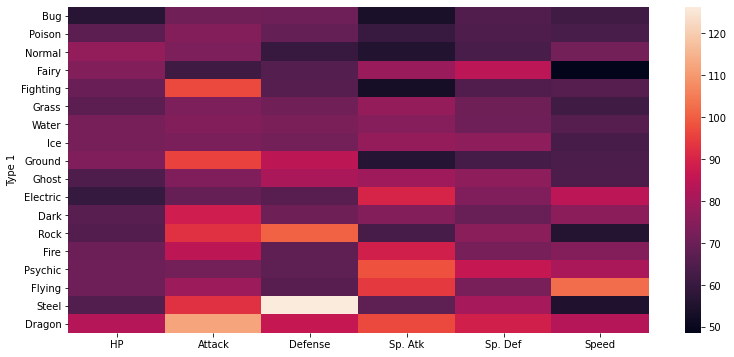

In [65]:
sns.heatmap(total_by_type)

1. Покемоны класса "Rock" и "Steel" имеют сходные показатели, однако "Steel" обладает наилучшим среди всех покемонов показателем защиты, в связи с чем входит в тройку лучших по суммарным характеристикам.
2. Наибольшее количество самых низких показателей имеет класс "Bug"
3. Наилучшими показателями атаки и здоровья обладают покемоны класса "Dragon"
4. Среди категорий самых слабых покемонов наилучшим показателем атаки обладают покемоны категории "Fighting"

### Зависимость средних статистических показателей покемонов класса "Bug" от второго класса

In [4]:
stat_by_type = df.groupby(['Type 1','Type 2']).mean().sort_values(['Type 1']).reset_index()
stat_bug = stat_by_type[stat_by_type['Type 1'] == 'Bug'].set_index('Type 2').sort_values('Total')
del stat_bug['#']
del stat_bug['Generation']
del stat_bug['Legendary']
stat_bug

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 2,,,,,,,,
Ghost,Bug,236.000000,1.000000,90.000000,45.000000,30.000000,30.000000,40.000000
Water,Bug,269.000000,40.000000,30.000000,32.000000,50.000000,52.000000,65.000000
NoneType,Bug,289.705882,53.058824,50.352941,55.411765,39.294118,43.647059,47.941176
Ground,Bug,345.000000,45.500000,62.000000,97.500000,44.500000,57.500000,38.000000
Poison,Bug,347.916667,53.750000,68.333333,58.083333,42.500000,59.333333,65.916667
Grass,Bug,384.000000,55.000000,73.833333,76.666667,57.333333,76.666667,44.500000
Electric,Bug,395.500000,60.000000,62.000000,55.000000,77.000000,55.000000,86.500000
Flying,Bug,419.500000,63.000000,70.142857,61.571429,72.857143,69.071429,82.857143
Rock,Bug,435.000000,46.666667,56.666667,146.666667,36.666667,113.333333,35.000000


<AxesSubplot:title={'center':'Зависимость средних стат. показателей покемонов класса "Bug" от второго класса'}, xlabel='Второй класс', ylabel='Количественный показатель'>

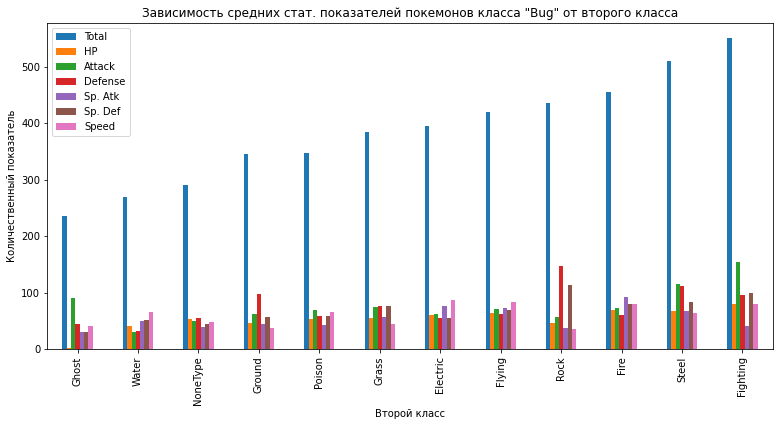

In [13]:
stat_bug.plot(kind='bar', title='Зависимость средних стат. показателей покемонов класса "Bug" от второго класса',  
              xlabel='Второй класс', ylabel='Количественный показатель')


1. Наилучшее сочетание характиристик атаки и защиты имеют покемоны класса "Bug" со второй характеристикой "Steel", при этом указанные покемоны также входят в тройку лучших по сумме всех характеристик.

2. Наиболее сбалансированные средние характеристики в тройке лучших по сумме всех характеристик имеют покемоны класса "Bug" со второй характеристикой "Fire".

3. Наилучшее сочетание характиристик защиты имеют покемоны класса "Bug" со второй характеристикой "Rock".

4. Наиболее сбалансированные средние характеристики имеют покемоны класса "Bug" со второй характеристикой "Flying".

### Зависимость характеристик от поколения покемонов

In [31]:
total_by_generation = df.groupby('Generation').mean().sort_values(['Generation']).drop(columns=['#', 'Total', 'Legendary'])

In [19]:
total_by_generation

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


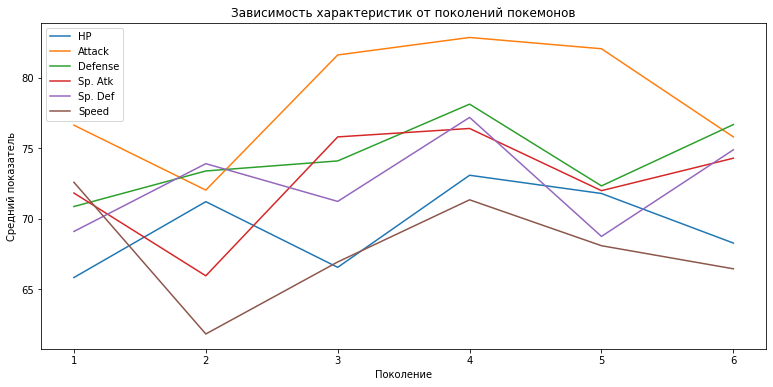

In [27]:
ax = total_by_generation.plot(
                             title='Зависимость характеристик от поколений покемонов', 
                             xlabel='Поколение', 
                             ylabel='Средний показатель')

1. Наилучшим сочетанием показателей обладает 4 поколение покемонов, после которого идет значительное снижение всех характеристик
2. Устойчивых тенденций в зависимости средних характеристик от поколений не имеется

### Распределение показателей здоровья, атаки, защиты и скорости

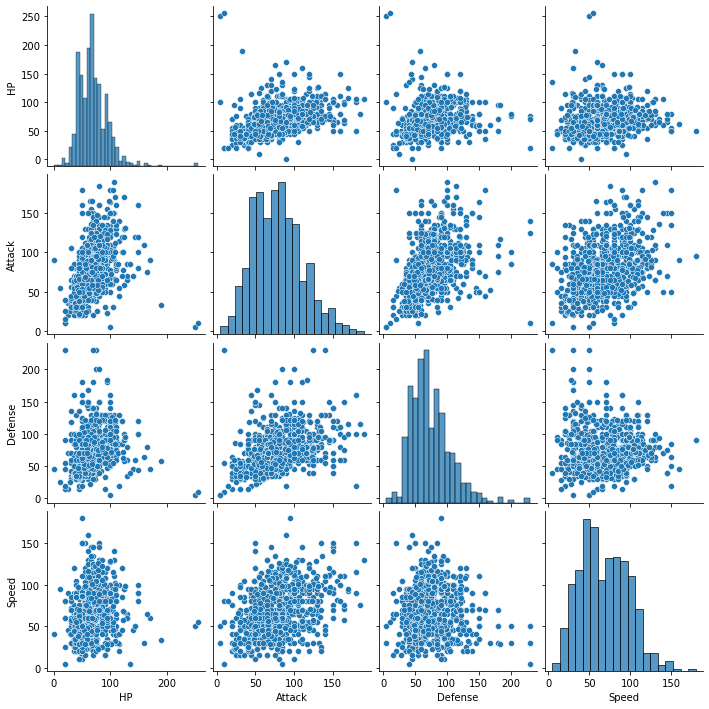

In [68]:
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Speed']])

1. Наибольшее количество покемонов имеют здоровье менее 150, при этом показатели атаки, защиты и скорости равномерно распределены у покемонов со здоровьем примерно от 50 до 120.
2. Наибольшее количество покемонов имеют показатель защиты от 20 до 120 и показатели атаки от 30 до 125
3. Есть небольшое количество покемонов, имеющих максимальный показатель здоровья (около 250), при этом показатели атаки и защиты минимальны